In [1]:
import matplotlib.pyplot as plt
import csv
import os
from math import sqrt
from statistics import mean
import numpy as np
import glob


files = glob.glob('./results/take1/*.csv')

print(files)

['./results/take1/camera_r_f_monocal.csv', './results/take1/camera_l_f_iris.csv', './results/take1/camera_r_f_card.csv', './results/take1/camera_l_f_monocal.csv', './results/take1/gt_gt.csv', './results/take1/camera_r_f_iris.csv', './results/take1/camera_l_f_card.csv']


# Filtering Out Missing Values

In [2]:
reader = csv.reader
data = {k.split('/')[-1].split('.')[0]:None for k in files}

for n in files:
    k = n.split('/')[-1].split('.')[0]
    with open(n) as f:
        reader = csv.reader(f)
        for idx, row in enumerate(reader):
            if idx == 1:
                row = list(map(lambda x: round(float(x), 2) if x else None, row))
                data[k] = row
print(data['gt_gt'])


[15.04, 14.99, 15.07, 15.13, 15.34, 13.49, 13.48, 13.23, 13.12, 13.07, 13.13, 13.15, 13.21, 13.3, 13.37, 13.4, 13.44, 13.45, 13.48, 13.49, 13.5, 13.58, 13.6, 13.66, 13.71, 13.69, 13.75, 13.66, 13.68, 13.68, 13.67, 13.7, 13.74, 13.79, 13.95, 14.11, 14.32, 14.49, 14.54, 14.59, 14.58, 14.59, 14.66, 14.74, 14.84, 14.98, 15.13, 15.15, 15.04, 14.96, 14.97, 14.96, 15.04, 15.12, 15.15, 15.36, 15.6, 16.02, 16.55, 17.06, 17.61, 18.21, 18.79, 19.33, 19.86, 20.25, 20.44, 20.5, 20.67, 20.81, 21.03, 21.26, 21.52, 21.91, 22.13, 22.42, 22.79, 23.21, 23.74, 24.3, 24.93, 25.71, 26.36, 27.64, 28.65, 29.13, 30.0, 30.9, 31.91, 32.47, 33.29, 33.79, 34.35, 34.69, 35.21, 35.51, 35.68, 36.17, 36.22, 36.6, 37.13, 37.54, 37.73, 38.09, 38.22, 38.55, 39.56, 40.08, 40.88, 41.22, 41.91, 42.41, 42.82, 43.95, 44.81, 45.6, 45.69, 46.57, 47.17, 47.87, 49.4, 49.06, None, None, None, None, 52.42, None, 56.61, 59.7, 60.95, 65.36, 63.67, 62.74, 67.02, 61.24, 66.44, 64.34, 70.19, 67.8, 76.99, 76.22, 79.68, 82.0, 80.0, 81.82,

In [3]:
for k, d in data.items():
    print(f'{k} - # of None vals: {len(list(filter(lambda x: x == None, d)))}')
    print()

camera_r_f_monocal - # of None vals: 0

camera_l_f_iris - # of None vals: 0

camera_r_f_card - # of None vals: 0

camera_l_f_monocal - # of None vals: 0

gt_gt - # of None vals: 8

camera_r_f_iris - # of None vals: 0

camera_l_f_card - # of None vals: 0



In [4]:
conditions = [x != None for x in data['gt_gt']]

filtered = {k:None for k in list(data.keys())}

for k, v in data.items():
    filtered[k] = [val for (val, cond) in zip(v, conditions) if cond]
    print(len(filtered[k]))

275
275
275
275
275
275
275


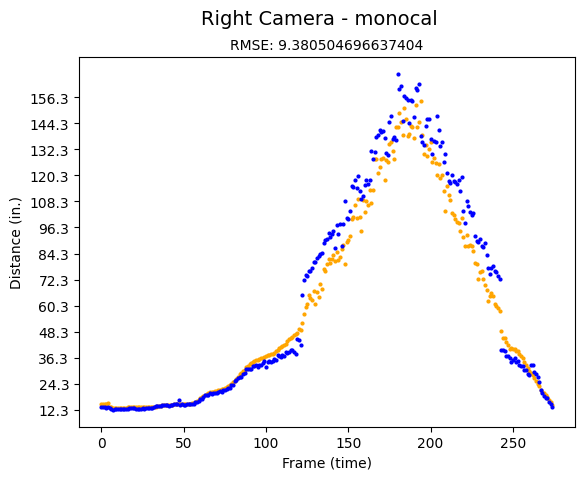

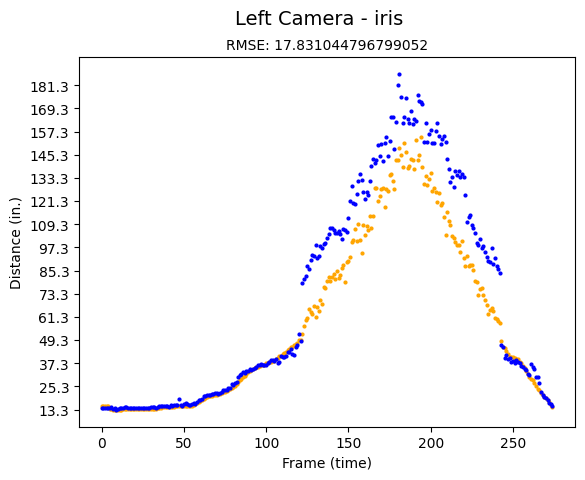

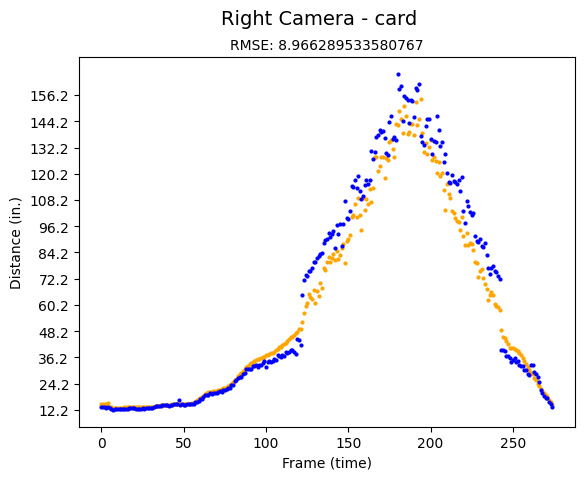

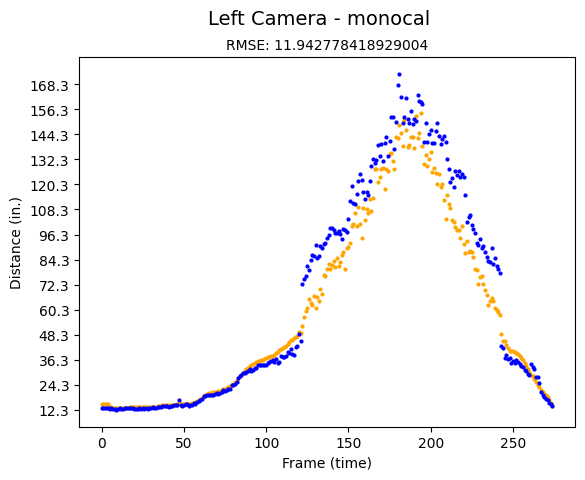

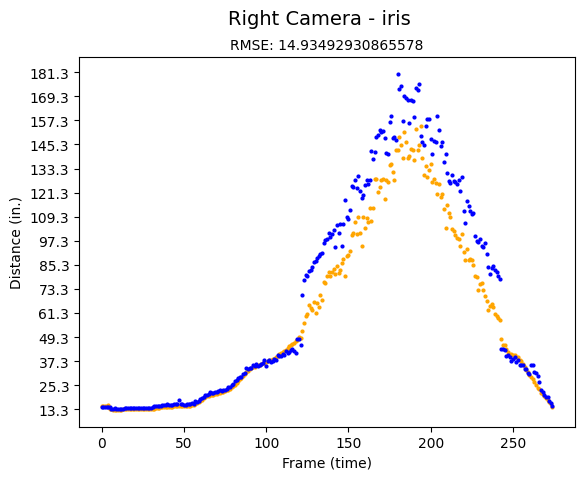

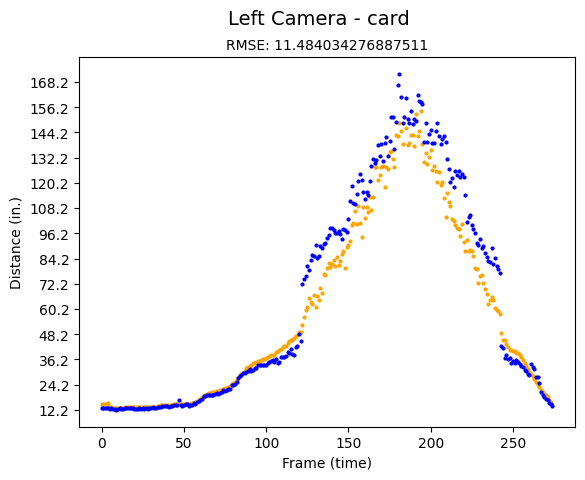

In [5]:
def rmse(y, yhat):
    errors = list(map(lambda x: (x[0] - x[1])**2, zip(y, yhat)))
    return sqrt((sum(errors)/ len(errors)))

def mae(y, yhat):
    errors = list(map(lambda x: (x[0] - x[1])**2, zip(y, yhat)))
    return sqrt((sum(errors)/ len(errors)))

xvals = [i for i in range(len(filtered['gt_gt']))]
s = 4
for k, dset in filtered.items():
    if k == 'gt_gt':
        continue
    error = rmse(filtered['gt_gt'], dset)
    plt.scatter(xvals, filtered['gt_gt'], s=s, c='orange')
    plt.scatter(xvals, dset, s=s, c='blue')
    if max(dset) > max(filtered['gt_gt']):
        plt.yticks(np.arange(min(dset), max(dset) + 1, 12))
    else:
        plt.yticks(np.arange(min(filtered['gt_gt']), max(filtered['gt_gt']) + 1, 12))
    if k.split('_')[1] == 'r':
        plt.suptitle(f"Right Camera - {k.split('_')[-1]}", fontsize=14)
    else:
        plt.suptitle(f"Left Camera - {k.split('_')[-1]}", fontsize=14)
    plt.title(f'RMSE: {error}', fontsize=10)
    plt.xlabel('Frame (time)')
    plt.ylabel('Distance (in.)')
    # plt.legend((gt, dat), ('gt', files[idx+1]))

    plt.savefig('./results/' + k + '.png')
    plt.show()

# Seperating Models

In [10]:
# iris model

cond = [x > 50 for x in filtered['gt_gt']]

iris = {k:None for k in list(data.keys())}
body = {k:None for k in list(data.keys())}

for k, v in filtered.items():
    body[k] = [val for (val, con) in zip(v, cond) if con]
    iris[k] = [val for (val, con) in zip(v, cond) if not con]
    print(f'iris:{len(iris[k])}\nbody: {len(body[k])}')


iris:154
body: 121
iris:154
body: 121
iris:154
body: 121
iris:154
body: 121
iris:154
body: 121
iris:154
body: 121
iris:154
body: 121


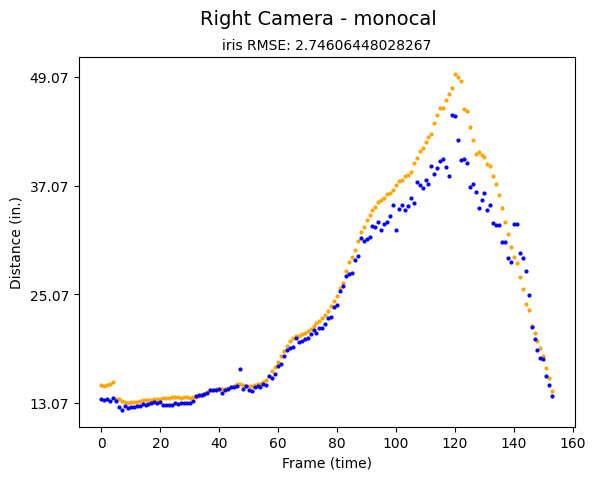

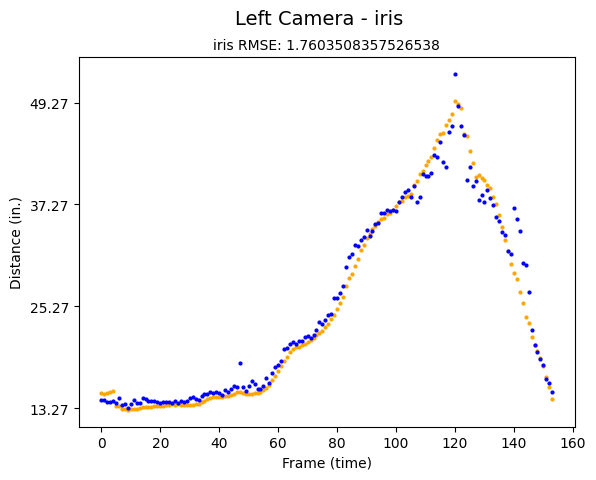

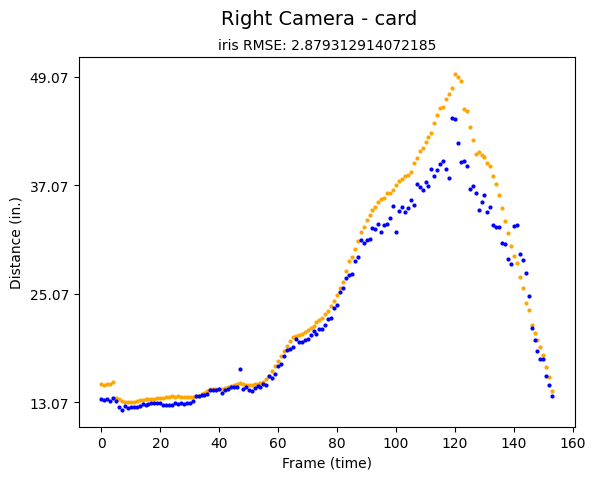

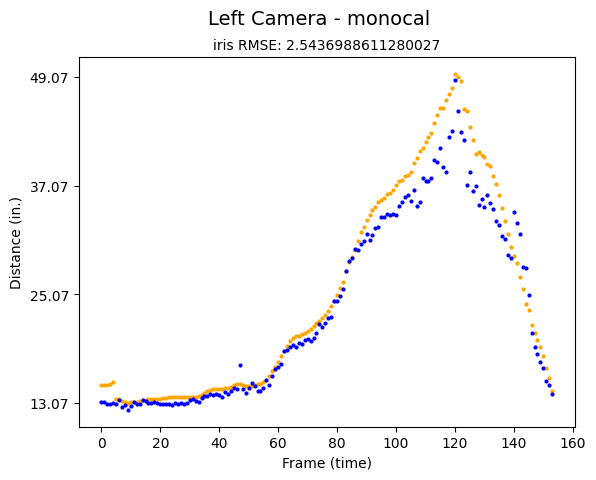

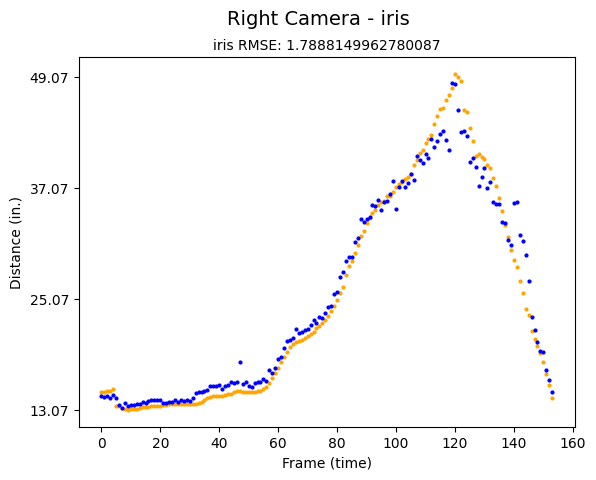

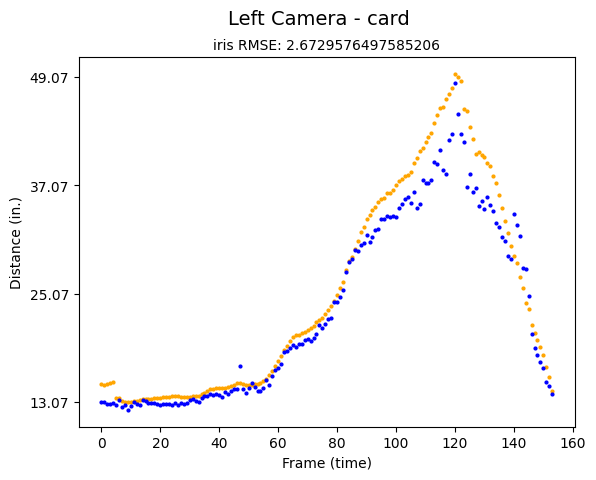

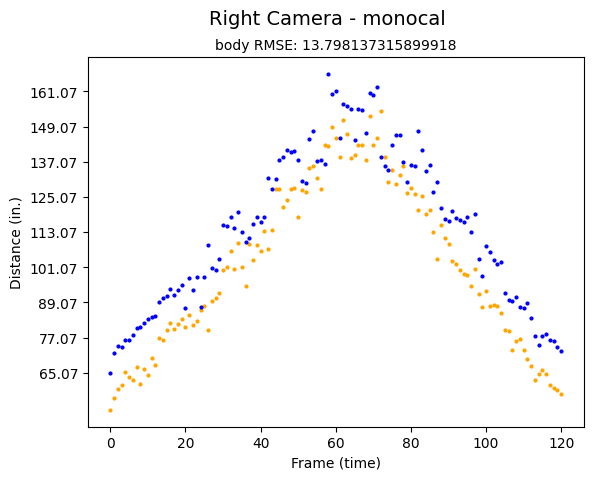

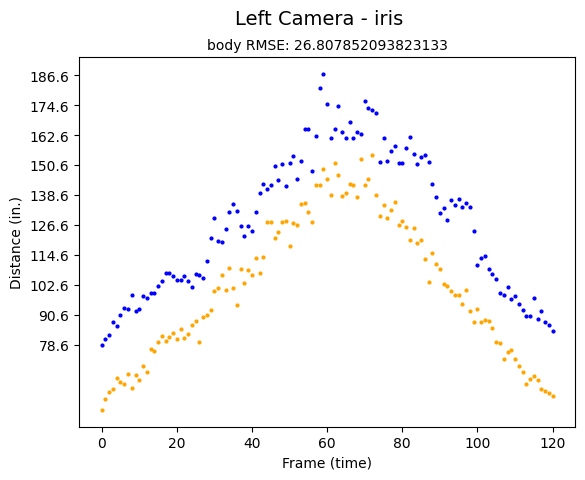

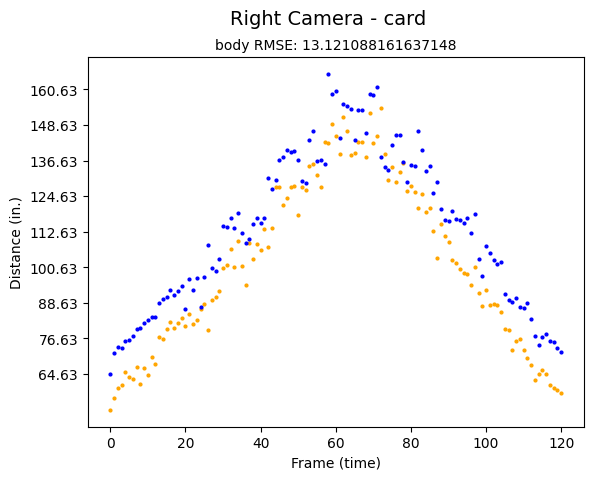

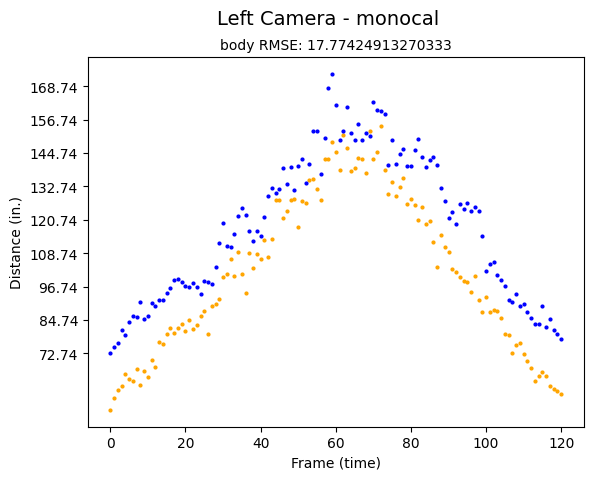

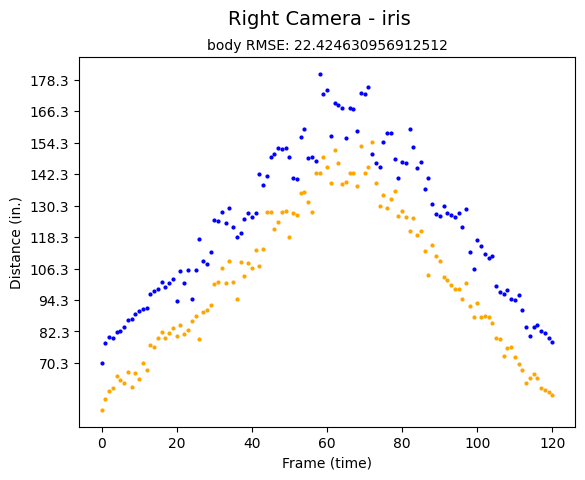

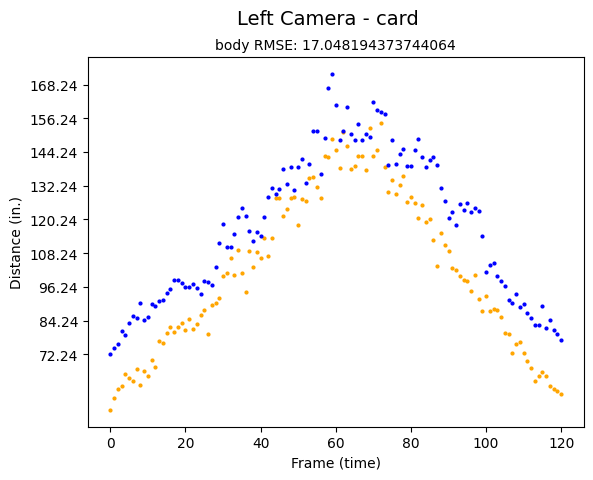

In [11]:
mods = [iris, body]
names = ['iris', 'body']
for m, n in zip(mods, names):
    xvals = [i for i in range(len(m['gt_gt']))]
    s = 4
    for k, dset in m.items():
        if k == 'gt_gt':
            continue
        error = rmse(m['gt_gt'], dset)
        plt.scatter(xvals, m['gt_gt'], s=s, c='orange')
        plt.scatter(xvals, dset, s=s, c='blue')
        if max(dset) > max(m['gt_gt']):
            plt.yticks(np.arange(min(dset), max(dset) + 1, 12))
        else:
            plt.yticks(np.arange(min(m['gt_gt']), max(m['gt_gt']) + 1, 12))
        if k.split('_')[1] == 'r':
            plt.suptitle(f"Right Camera - {k.split('_')[-1]}", fontsize=14)
        else:
            plt.suptitle(f"Left Camera - {k.split('_')[-1]}", fontsize=14)
        plt.title(f'{n} RMSE: {error}', fontsize=10)
        plt.xlabel('Frame (time)')
        plt.ylabel('Distance (in.)')
        # plt.legend((gt, dat), ('gt', files[idx+1]))

        plt.savefig('./results/' + n + '_' + k + '.png')
        plt.show()